
Assignment for Week 4<br>
Submitted by: Chris Panican<br>
Intro to Machine Learning CSc 55929<br>
Prof. Erik Grimmelmann<br>


Week 4 assignment:<br>
1. Using the Iris dataset, pick two classes that are not linearly separable when you use only two features (e.g., Iris-setosa and Iris-versicolor when using petal length and sepal length).<br>
2. Train the Adaline learning model using the following:
  * All six cases of using two features at a time.
  * All four cases of using three features at a time.
  * The one case of using all features at once.
3. Summarize your results (i.e, what’ s the best accuracy you can obtain for each of the 11 cases you considered) in a table.
4. Discuss your findings. Does using more dimensions help when trying to classify the data in this dataset?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap

In [2]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.
    
    
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """ Calculate net input """
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """ Compute linear activation """
        return X

    def predict(self, X):
        """ Return class label after unit step """
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [3]:
# Helper function to get NF (X), and NC (y) values.
def get_NF_NC():
    i = 0
    numCl = 0
    for i in range(0 , len(Cl)):
        if Cl[i] == IC[cdx[0]]:
            numCl += 1
        if Cl[i] == IC[cdx[1]]:
            numCl += 1    
        i += 1  

    NC = np.zeros((numCl))
    NF = np.zeros((numCl, 2))

    i = 0
    j = 0
    for i in range(0 , len(Cl)):
        if Cl[i] == IC[cdx[0]]:

            NC[j] = 1
            NF[j,0] = IA[i,fdx[0]]
            NF[j,1] = IA[i,fdx[1]]
            j += 1
        if Cl[i] == IC[cdx[1]]:      
            NC[j] = -1
            NF[j,0] = IA[i,fdx[0]]
            NF[j,1] = IA[i,fdx[1]]
            j += 1
        i += 1
    return (NF, NC)

In [4]:
# Helper function to plot decision regions
def plot_decision_regions(NF,NC, classifier, resolution=0.02, weight=False):
    if weight:
        colors = ('red', 'blue')
        cmap = ListedColormap(colors[:len(np.unique(NC))])
    x1_min, x1_max = NF[:, 0].min() - 1, NF[:, 0].max() + 1
    x2_min, x2_max = NF[:, 1].min() - 1, NF[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    if weight:
        plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max()) 
    for idx, cls in enumerate(np.unique(NC)):
        plt.scatter(x=NF[NC == cls, 0], y=NF[NC == cls, 1], alpha=0.8, color=pltC[cdx[idx]], marker=pltM[cdx[idx]], label=IC[cdx[idx]])

In [5]:
def features_plot(NF, NC):
    plt.scatter(x = NF[NC == 1, 0], y = NF[NC == 1, 1], color=pltC[cdx[0]], 
                marker=pltM[cdx[0]], label=IC[cdx[0]])
    plt.scatter(x = NF[NC == -1, 0], y = NF[NC == -1, 1], color=pltC[cdx[1]], 
                marker=pltM[cdx[1]], label=IC[cdx[1]])
    plt.xlabel(IrisF[fdx[0]])
    plt.ylabel(IrisF[fdx[1]])
    plt.legend(loc='lower right')
    plt.show()

In [6]:
# Iris Dataset

In [7]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
# df = pd.read_csv('iris.csv', header = None)
df.tail()

IA = df.iloc[:,:].values
for i_ in range(0,len(df),10):
    print(i_, IA[i_,:])


0 [5.1 3.5 1.4 0.2 'Iris-setosa']
10 [5.4 3.7 1.5 0.2 'Iris-setosa']
20 [5.4 3.4 1.7 0.2 'Iris-setosa']
30 [4.8 3.1 1.6 0.2 'Iris-setosa']
40 [5.0 3.5 1.3 0.3 'Iris-setosa']
50 [7.0 3.2 4.7 1.4 'Iris-versicolor']
60 [5.0 2.0 3.5 1.0 'Iris-versicolor']
70 [5.9 3.2 4.8 1.8 'Iris-versicolor']
80 [5.5 2.4 3.8 1.1 'Iris-versicolor']
90 [5.5 2.6 4.4 1.2 'Iris-versicolor']
100 [6.3 3.3 6.0 2.5 'Iris-virginica']
110 [6.5 3.2 5.1 2.0 'Iris-virginica']
120 [6.9 3.2 5.7 2.3 'Iris-virginica']
130 [7.4 2.8 6.1 1.9 'Iris-virginica']
140 [6.7 3.1 5.6 2.4 'Iris-virginica']


In [8]:
# get Iris classifications

IC = np.unique(IA[:,4])
pltC = ('red', 'blue', 'green')
pltM = ('o', 'x', '*')
for i in range(0,3):
    print(IC[i], pltC[i], pltM[i])
    

Iris-setosa red o
Iris-versicolor blue x
Iris-virginica green *


In [9]:
# Setup Iris feature lablels

IrisF=("sepal length in cm", "sepal width in cm", "petal length in cm", "petal width in cm")
for i in range(0,4):
    print(IrisF[i])


sepal length in cm
sepal width in cm
petal length in cm
petal width in cm


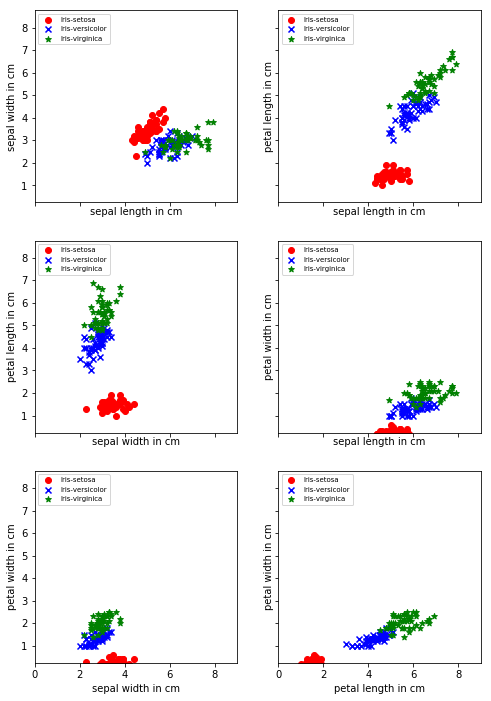

In [10]:
# plot classifications of all pairs of features 

plt.close('all')
fig, ax = plt.subplots(nrows=3, ncols=2, figsize= (8,12), sharex=True, sharey=True)

Cl = IA[:,4]
i = 0
k = 0
k1 = 0
k2 = 0
while i < 4:
    yF = IrisF[i]
    j = 0
    while j < i:
        k1 = np.int(k/2)
        k2 = np.mod(k,2)
        xF = IrisF[j]
        ax[k1,k2].scatter(x=IA[Cl == IC[0], j], y=IA[Cl == IC[0], i], color=pltC[0], marker=pltM[0], label=IC[0])
        ax[k1,k2].scatter(x=IA[Cl == IC[1], j], y=IA[Cl == IC[1], i], color=pltC[1], marker=pltM[1], label=IC[1])
        ax[k1,k2].scatter(x=IA[Cl == IC[2], j], y=IA[Cl == IC[2], i], color=pltC[2], marker=pltM[2], label=IC[2])
        ax[k1,k2].set(aspect='equal')
        ax[k1,k2].set_xlim([0,9])
        ax[k1,k2].set_ylim([0,9])
        ax[k1,k2].set_xlabel(xF)
        ax[k1,k2].set_ylabel(yF)
        ax[k1,k2].legend(loc='upper left', fontsize='x-small')
        j += 1
        k += 1
    i += 1
plt.show()    

## 1. Using the Iris dataset, pick two classes that are not linearly separable when you use only two features.

### Class: Iris-versicolor and Iris-verginica with feature petal length and sepal length

In [11]:
# focus on classification of "versicolor" and "verginica", class indexes 1 and 2
cdx = np.array([1,2])   
# focus on the features "sepal length" and "petal length", feature indexes 0 and 2
fdx = np.array([0,2])

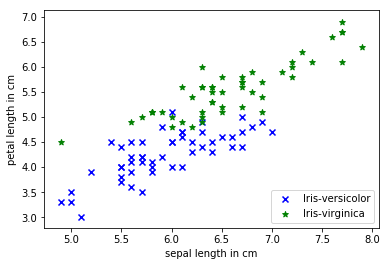

In [12]:
NF, NC = get_NF_NC()

plt.close('all')
features_plot(NF, NC)

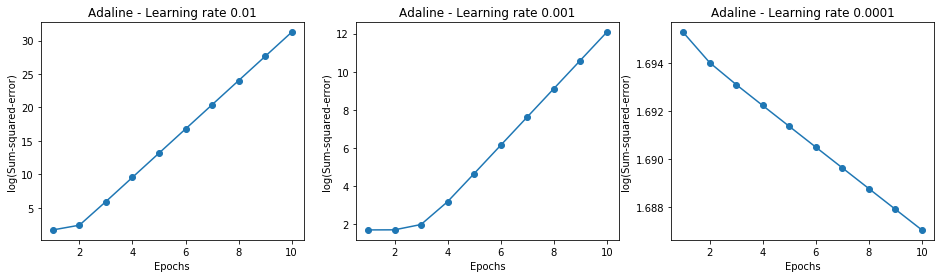

In [13]:
# Cost function plots.

plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(NF, NC)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.001).fit(NF, NC)
ax[1].plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.001')

ada3 = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax[2].plot(range(1, len(ada2.cost_) + 1), np.log10(ada3.cost_), marker='o')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('log(Sum-squared-error)')
ax[2].set_title('Adaline - Learning rate 0.0001')
plt.show()


In [14]:
# Standarize inputs and show differences.

NF_std = np.copy(NF)
NF_std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()

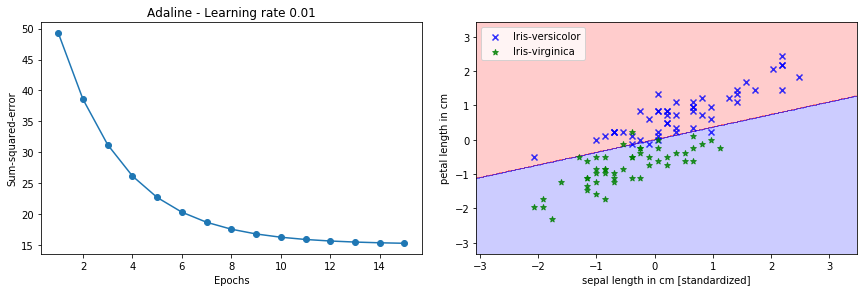

In [15]:
plt.close('all')
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(NF_std, NC)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

plot_decision_regions(NF_std, NC, classifier=ada, weight=True)
plt.xlabel(IrisF[fdx[0]] + ' [standardized]')
plt.ylabel(IrisF[fdx[1]])
plt.legend(loc='upper left', fontsize='medium')
plt.tight_layout()

ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
ax[0].set_title('Adaline - Learning rate 0.01')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Sum-squared-error')
plt.show()

In [16]:
accuracy = []

## 2. Train Adaline model using the following:
### 2.1: All six cases of using two features at a time.
2.1.1: sepal length & sepal width <br/>
2.1.2: sepal length & petal length <br/>
2.1.3: sepal length & petal width <br/>
2.1.4: sepal width & petal length <br/>
2.1.5: sepal width & petal width <br/>
2.1.6: petal length & petal width <br/>

### 2.1.1: sepal length & sepal width

In [17]:
fdx = np.array([0,1])
NF, NC = get_NF_NC()

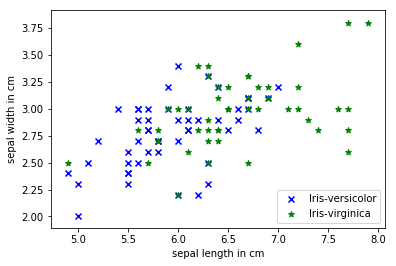

In [18]:
plt.close('all')
features_plot(NF, NC)

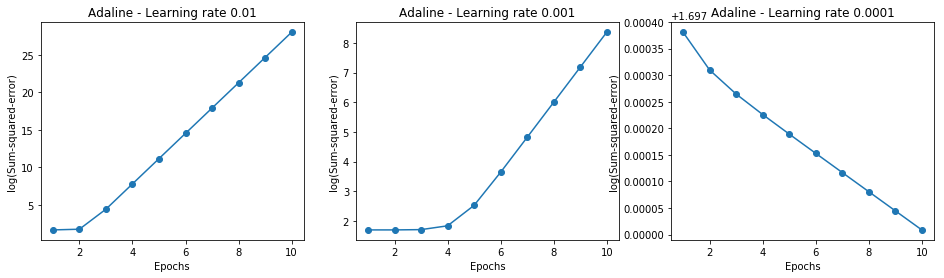

In [19]:
# Cost function plots.

plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(NF, NC)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.001).fit(NF, NC)
ax[1].plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.001')

ada3 = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax[2].plot(range(1, len(ada2.cost_) + 1), np.log10(ada3.cost_), marker='o')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('log(Sum-squared-error)')
ax[2].set_title('Adaline - Learning rate 0.0001')
plt.show()

In [20]:
# Standarize inputs

NF_std = np.copy(NF)
NF_std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()

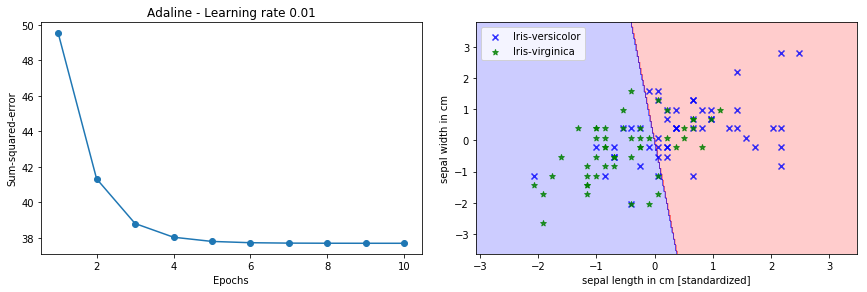

In [21]:
plt.close('all')
ada1.fit(NF_std, NC)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

plot_decision_regions(NF_std, NC, classifier=ada1, weight=True)
plt.xlabel(IrisF[fdx[0]] + ' [standardized]')
plt.ylabel(IrisF[fdx[1]])
plt.legend(loc='upper left', fontsize='medium')
plt.tight_layout()

ax[0].plot(range(1, len(ada1.cost_) + 1), ada1.cost_, marker='o')
ax[0].set_title('Adaline - Learning rate 0.01')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Sum-squared-error')
plt.show()

In [22]:
accuracy.append(ada1.cost_[9])

### 2.1.2: sepal length & petal length

In [23]:
fdx = np.array([0,2])
NF, NC = get_NF_NC()

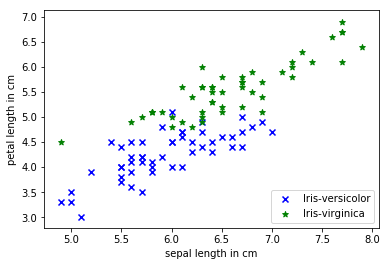

In [24]:
plt.close('all')
features_plot(NF, NC)

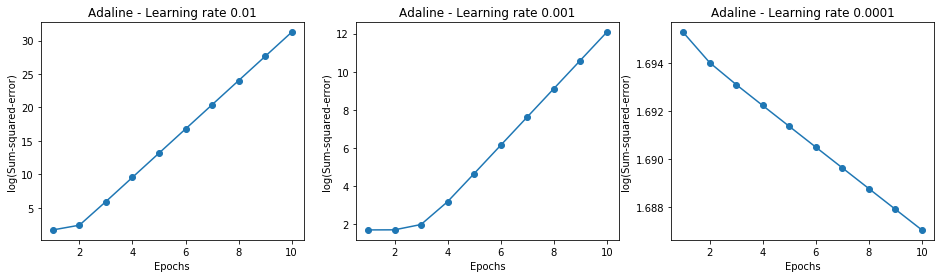

In [25]:
# Cost function plots.

plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(NF, NC)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.001).fit(NF, NC)
ax[1].plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.001')

ada3 = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax[2].plot(range(1, len(ada2.cost_) + 1), np.log10(ada3.cost_), marker='o')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('log(Sum-squared-error)')
ax[2].set_title('Adaline - Learning rate 0.0001')
plt.show()

In [26]:
# Standarize inputs

NF_std = np.copy(NF)
NF_std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()

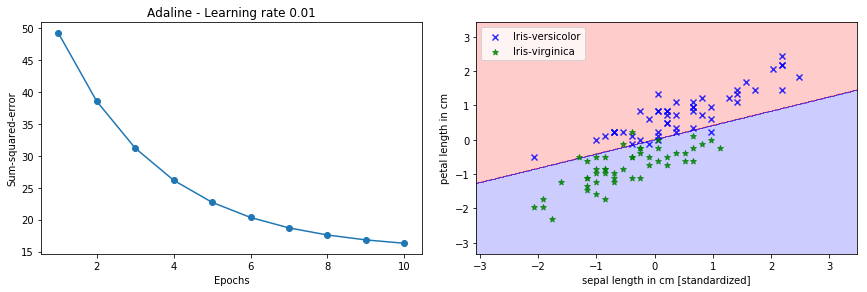

In [27]:
plt.close('all')
ada1.fit(NF_std, NC)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

plot_decision_regions(NF_std, NC, classifier=ada1, weight=True)
plt.xlabel(IrisF[fdx[0]] + ' [standardized]')
plt.ylabel(IrisF[fdx[1]])
plt.legend(loc='upper left', fontsize='medium')
plt.tight_layout()

ax[0].plot(range(1, len(ada1.cost_) + 1), ada1.cost_, marker='o')
ax[0].set_title('Adaline - Learning rate 0.01')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Sum-squared-error')
plt.show()

In [28]:
accuracy.append(ada1.cost_[9])

### 2.1.3: sepal length & petal width

In [29]:
fdx = np.array([0,3])
NF, NC = get_NF_NC()

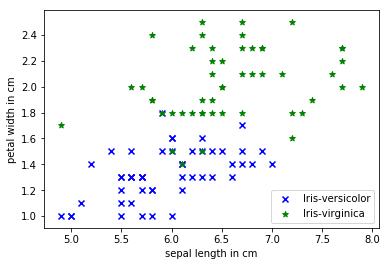

In [30]:
plt.close('all')
features_plot(NF, NC)

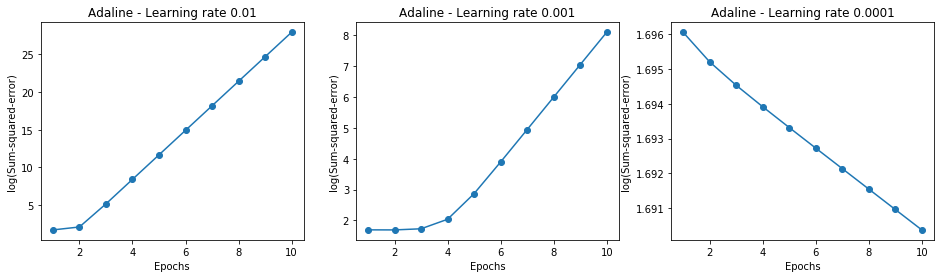

In [31]:
# Cost function plots.

plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(NF, NC)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.001).fit(NF, NC)
ax[1].plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.001')

ada3 = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax[2].plot(range(1, len(ada2.cost_) + 1), np.log10(ada3.cost_), marker='o')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('log(Sum-squared-error)')
ax[2].set_title('Adaline - Learning rate 0.0001')
plt.show()

In [32]:
# Standarize inputs

NF_std = np.copy(NF)
NF_std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()

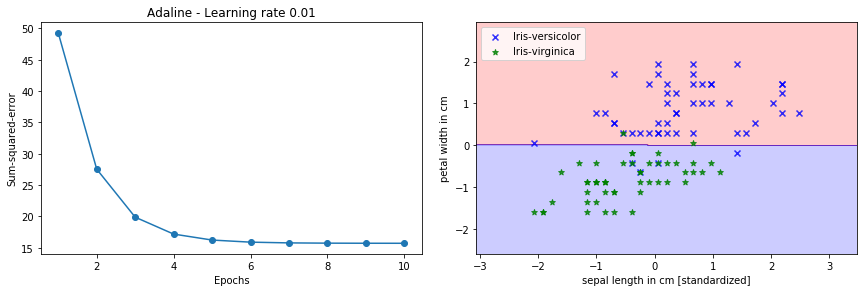

In [33]:
plt.close('all')
ada1.fit(NF_std, NC)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

plot_decision_regions(NF_std, NC, classifier=ada1, weight=True)
plt.xlabel(IrisF[fdx[0]] + ' [standardized]')
plt.ylabel(IrisF[fdx[1]])
plt.legend(loc='upper left', fontsize='medium')
plt.tight_layout()

ax[0].plot(range(1, len(ada1.cost_) + 1), ada1.cost_, marker='o')
ax[0].set_title('Adaline - Learning rate 0.01')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Sum-squared-error')
plt.show()

In [34]:
accuracy.append(ada1.cost_[9])

### 2.1.4: sepal width & petal length

In [35]:
fdx = np.array([1,2])
NF, NC = get_NF_NC()

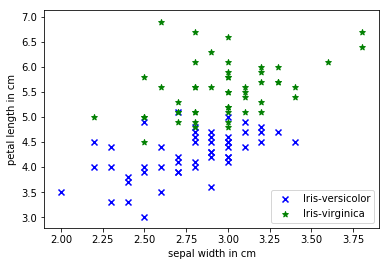

In [36]:
plt.close('all')
features_plot(NF, NC)

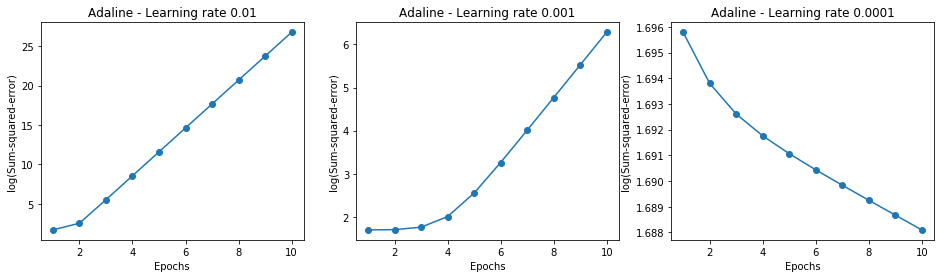

In [37]:
# Cost function plots.

plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(NF, NC)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.001).fit(NF, NC)
ax[1].plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.001')

ada3 = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax[2].plot(range(1, len(ada2.cost_) + 1), np.log10(ada3.cost_), marker='o')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('log(Sum-squared-error)')
ax[2].set_title('Adaline - Learning rate 0.0001')
plt.show()

In [38]:
# Standarize inputs

NF_std = np.copy(NF)
NF_std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()

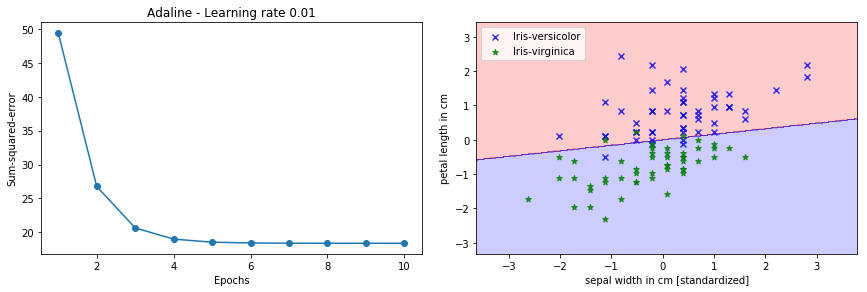

In [39]:
plt.close('all')
ada1.fit(NF_std, NC)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

plot_decision_regions(NF_std, NC, classifier=ada1, weight=True)
plt.xlabel(IrisF[fdx[0]] + ' [standardized]')
plt.ylabel(IrisF[fdx[1]])
plt.legend(loc='upper left', fontsize='medium')
plt.tight_layout()

ax[0].plot(range(1, len(ada1.cost_) + 1), ada1.cost_, marker='o')
ax[0].set_title('Adaline - Learning rate 0.01')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Sum-squared-error')
plt.show()

In [40]:
accuracy.append(ada1.cost_[9])

### 2.1.5: sepal width & petal width

In [41]:
fdx = np.array([1,3])
NF, NC = get_NF_NC()

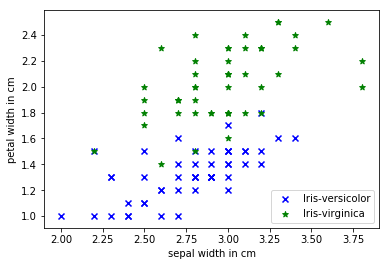

In [42]:
plt.close('all')
features_plot(NF, NC)

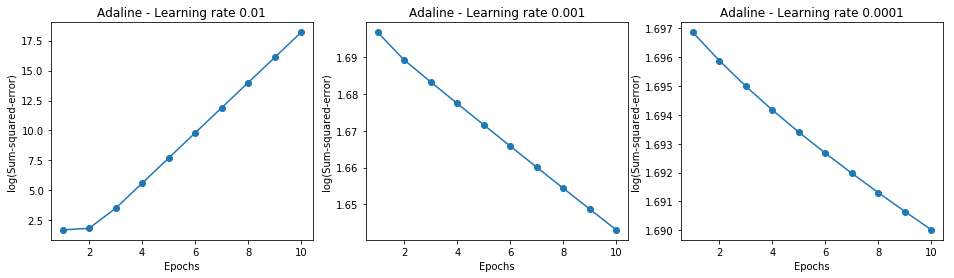

In [43]:
# Cost function plots.

plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(NF, NC)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.001).fit(NF, NC)
ax[1].plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.001')

ada3 = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax[2].plot(range(1, len(ada2.cost_) + 1), np.log10(ada3.cost_), marker='o')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('log(Sum-squared-error)')
ax[2].set_title('Adaline - Learning rate 0.0001')
plt.show()

In [44]:
# Standarize inputs

NF_std = np.copy(NF)
NF_std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()

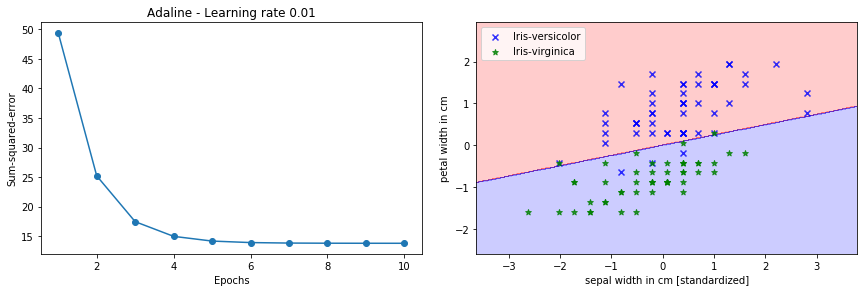

In [45]:
plt.close('all')
ada1.fit(NF_std, NC)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

plot_decision_regions(NF_std, NC, classifier=ada1, weight=True)
plt.xlabel(IrisF[fdx[0]] + ' [standardized]')
plt.ylabel(IrisF[fdx[1]])
plt.legend(loc='upper left', fontsize='medium')
plt.tight_layout()

ax[0].plot(range(1, len(ada1.cost_) + 1), ada1.cost_, marker='o')
ax[0].set_title('Adaline - Learning rate 0.01')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Sum-squared-error')
plt.show()

In [46]:
accuracy.append(ada1.cost_[9])

### 2.1.6: petal length & petal width

In [47]:
fdx = np.array([2,3])
NF, NC = get_NF_NC()

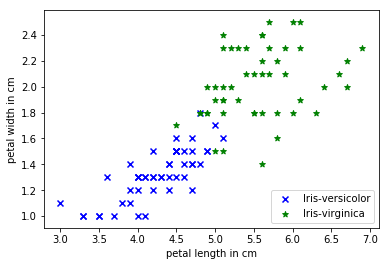

In [48]:
plt.close('all')
features_plot(NF, NC)

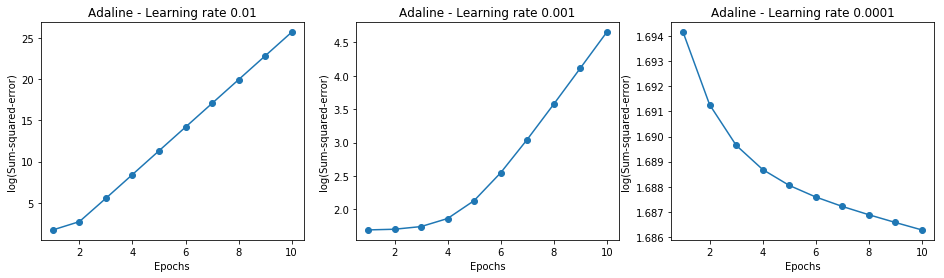

In [49]:
# Cost function plots.

plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(NF, NC)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.001).fit(NF, NC)
ax[1].plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.001')

ada3 = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax[2].plot(range(1, len(ada2.cost_) + 1), np.log10(ada3.cost_), marker='o')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('log(Sum-squared-error)')
ax[2].set_title('Adaline - Learning rate 0.0001')
plt.show()

In [50]:
# Standarize inputs

NF_std = np.copy(NF)
NF_std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()

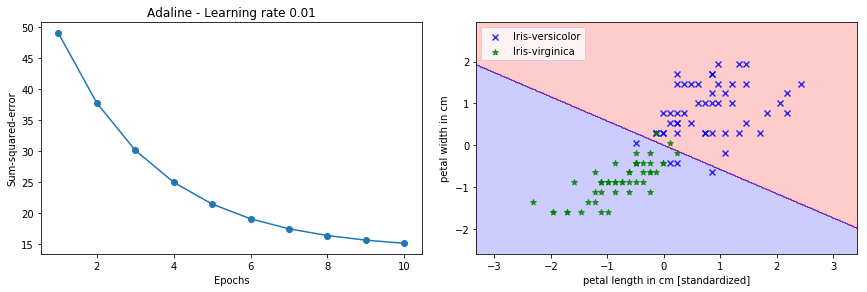

In [51]:
plt.close('all')
ada1.fit(NF_std, NC)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

plot_decision_regions(NF_std, NC, classifier=ada1, weight=True)
plt.xlabel(IrisF[fdx[0]] + ' [standardized]')
plt.ylabel(IrisF[fdx[1]])
plt.legend(loc='upper left', fontsize='medium')
plt.tight_layout()

ax[0].plot(range(1, len(ada1.cost_) + 1), ada1.cost_, marker='o')
ax[0].set_title('Adaline - Learning rate 0.01')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Sum-squared-error')
plt.show()

In [52]:
accuracy.append(ada1.cost_[9])

### 2.2: All four cases of using three features at a time.
2.2.1: sepal length, sepal width, and petal length <br/>
2.2.2: sepal length, sepal width, and petal width <br/>
2.2.3: sepal length, petal length, and petal width <br/>
2.2.4: sepal width, petal length, and petal width <br/>

### 2.2.1: sepal length, sepal width, and petal length

### Visualize all three cases in three separate plots

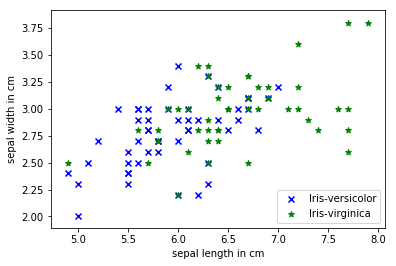

In [53]:
# sepal length & sepal width
fdx = np.array([0,1])
NF, NC = get_NF_NC()
plt.close('all')
features_plot(NF, NC)

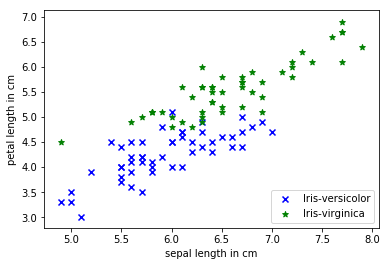

In [54]:
# sepal length & petal length
fdx = np.array([0,2])
NF, NC = get_NF_NC()
plt.close('all')
features_plot(NF, NC)

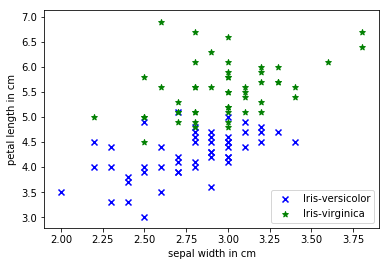

In [55]:
# sepal width & petal length
fdx = np.array([1,2])
NF, NC = get_NF_NC()
plt.close('all')
features_plot(NF, NC)

In [56]:
# Use all 3 sets of features from above
fdx = np.array([0,1,2])
NF, NC = get_NF_NC()

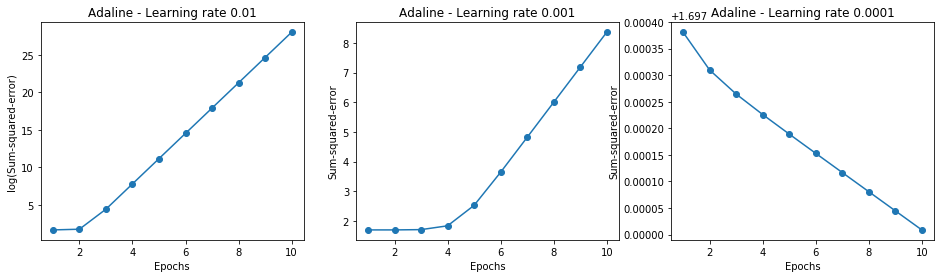

In [57]:
# Cost function plots.

plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(NF, NC)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.001).fit(NF, NC)
ax[1].plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_), marker='o')
ax[1].set_title('Adaline - Learning rate 0.001')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')

ada3 = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax[2].plot(range(1, len(ada3.cost_) + 1), np.log10(ada3.cost_), marker='o')
ax[2].set_title('Adaline - Learning rate 0.0001')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Sum-squared-error')
plt.show()

In [58]:
# Standarize inputs

NF_std = np.copy(NF)
NF_std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()

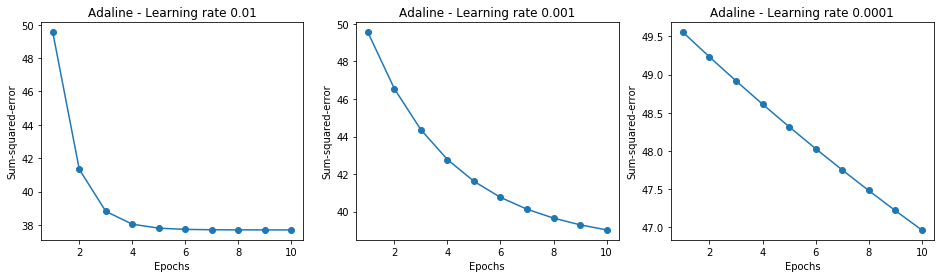

In [59]:
plt.close('all')
ada1.fit(NF_std, NC)
ada2.fit(NF_std, NC)
ada3.fit(NF_std, NC)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,4))

ax[0].plot(range(1, len(ada1.cost_) + 1), ada1.cost_, marker='o')
ax[0].set_title('Adaline - Learning rate 0.01')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Sum-squared-error')

ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_title('Adaline - Learning rate 0.001')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')

ax[2].plot(range(1, len(ada3.cost_) + 1), ada3.cost_, marker='o')
ax[2].set_title('Adaline - Learning rate 0.0001')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Sum-squared-error')
plt.show()

In [60]:
accuracy.append(ada1.cost_[9])

### 2.2.2: sepal length, sepal width, and petal width

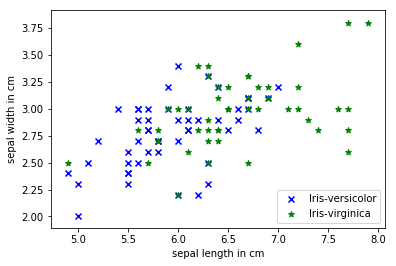

In [61]:
# sepal length & sepal width
fdx = np.array([0,1])
NF, NC = get_NF_NC()
plt.close('all')
features_plot(NF, NC)

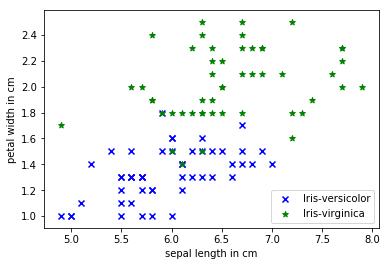

In [62]:
# sepal length & petal width
fdx = np.array([0,3])
NF, NC = get_NF_NC()
plt.close('all')
features_plot(NF, NC)

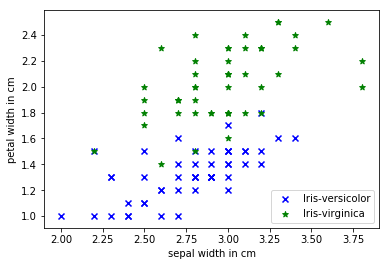

In [63]:
# sepal width & petal width
fdx = np.array([1,3])
NF, NC = get_NF_NC()
plt.close('all')
features_plot(NF, NC)

In [64]:
# Use all 3 sets of features from above
fdx = np.array([0,1,3])
NF, NC = get_NF_NC()

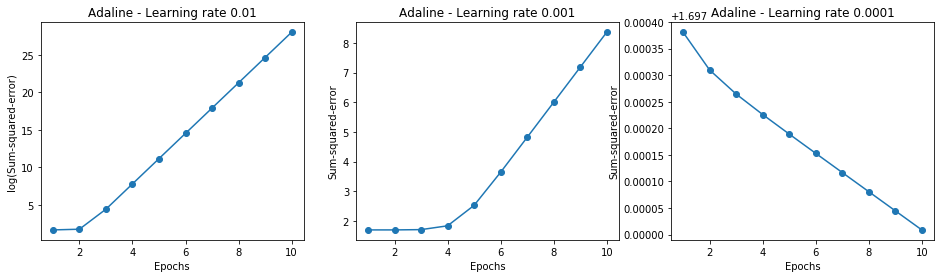

In [65]:
# Cost function plots.

plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(NF, NC)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.001).fit(NF, NC)
ax[1].plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_), marker='o')
ax[1].set_title('Adaline - Learning rate 0.001')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')

ada3 = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax[2].plot(range(1, len(ada3.cost_) + 1), np.log10(ada3.cost_), marker='o')
ax[2].set_title('Adaline - Learning rate 0.0001')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Sum-squared-error')
plt.show()

In [66]:
# Standarize inputs

NF_std = np.copy(NF)
NF_std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()

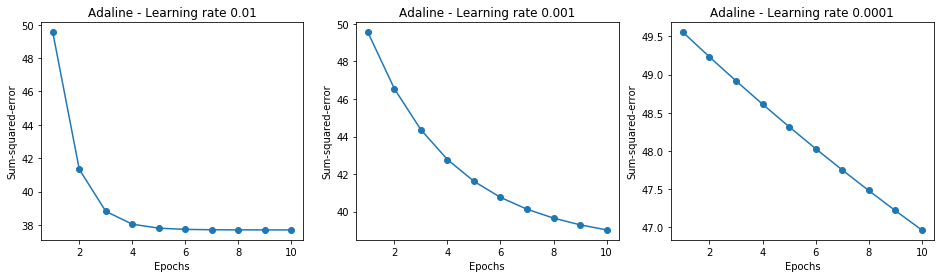

In [67]:
plt.close('all')
ada1.fit(NF_std, NC)
ada2.fit(NF_std, NC)
ada3.fit(NF_std, NC)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,4))

ax[0].plot(range(1, len(ada1.cost_) + 1), ada1.cost_, marker='o')
ax[0].set_title('Adaline - Learning rate 0.01')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Sum-squared-error')

ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_title('Adaline - Learning rate 0.001')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')

ax[2].plot(range(1, len(ada3.cost_) + 1), ada3.cost_, marker='o')
ax[2].set_title('Adaline - Learning rate 0.0001')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Sum-squared-error')
plt.show()

In [68]:
accuracy.append(ada1.cost_[9])

### 2.2.3: sepal length, petal length, and petal width

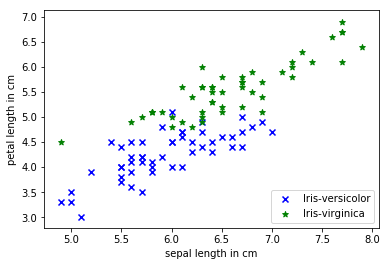

In [69]:
# sepal length & petal length
fdx = np.array([0,2])
NF, NC = get_NF_NC()
plt.close('all')
features_plot(NF, NC)

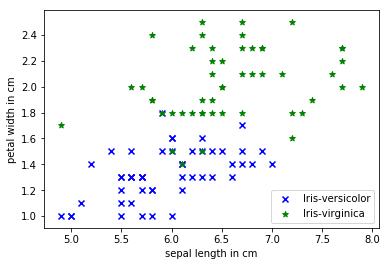

In [70]:
# sepal length & petal width
fdx = np.array([0,3])
NF, NC = get_NF_NC()
plt.close('all')
features_plot(NF, NC)

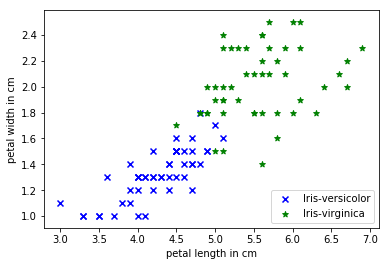

In [71]:
# petal length & petal width
fdx = np.array([2,3])
NF, NC = get_NF_NC()
plt.close('all')
features_plot(NF, NC)

In [72]:
# Use all 3 sets of features from above
fdx = np.array([0,2,3])
NF, NC = get_NF_NC()

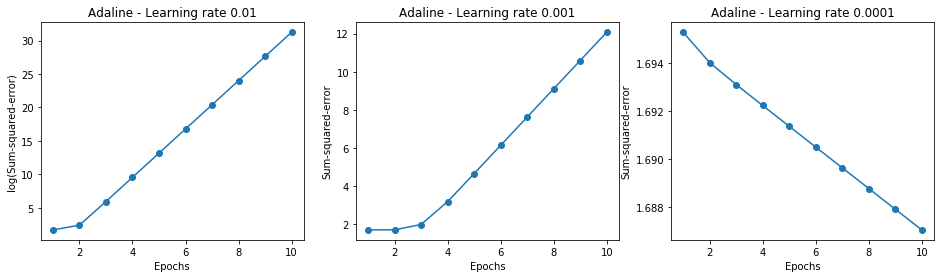

In [73]:
# Cost function plots.

plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(NF, NC)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.001).fit(NF, NC)
ax[1].plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_), marker='o')
ax[1].set_title('Adaline - Learning rate 0.001')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')

ada3 = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax[2].plot(range(1, len(ada3.cost_) + 1), np.log10(ada3.cost_), marker='o')
ax[2].set_title('Adaline - Learning rate 0.0001')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Sum-squared-error')
plt.show()

In [74]:
# Standarize inputs

NF_std = np.copy(NF)
NF_std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()

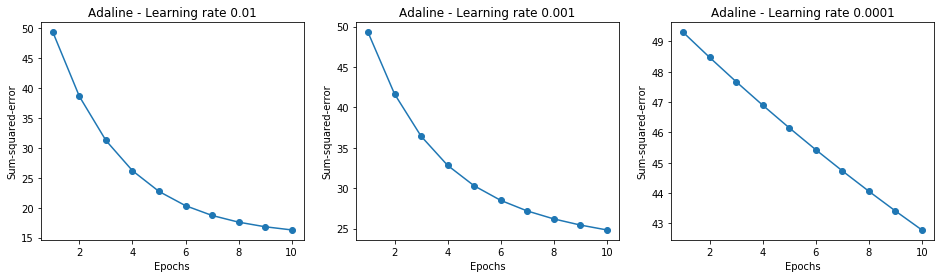

In [75]:
plt.close('all')
ada1.fit(NF_std, NC)
ada2.fit(NF_std, NC)
ada3.fit(NF_std, NC)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,4))

ax[0].plot(range(1, len(ada1.cost_) + 1), ada1.cost_, marker='o')
ax[0].set_title('Adaline - Learning rate 0.01')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Sum-squared-error')

ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_title('Adaline - Learning rate 0.001')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')

ax[2].plot(range(1, len(ada3.cost_) + 1), ada3.cost_, marker='o')
ax[2].set_title('Adaline - Learning rate 0.0001')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Sum-squared-error')
plt.show()

In [76]:
accuracy.append(ada1.cost_[9])

### 2.2.4: sepal width, petal length, and petal width

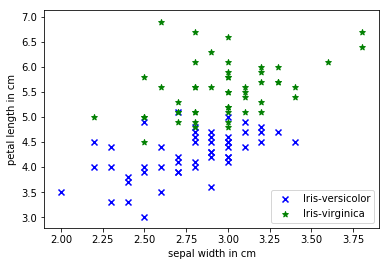

In [77]:
# sepal width & petal length
fdx = np.array([1,2])
NF, NC = get_NF_NC()
plt.close('all')
features_plot(NF, NC)

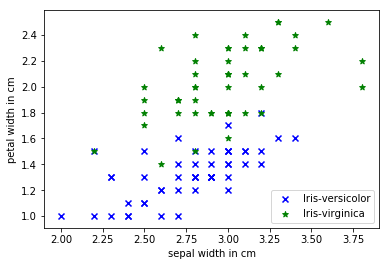

In [78]:
# sepal width & petal width
fdx = np.array([1,3])
NF, NC = get_NF_NC()
plt.close('all')
features_plot(NF, NC)

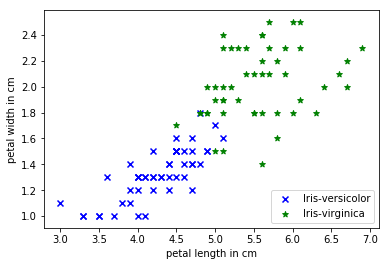

In [79]:
# petal length & petal width
fdx = np.array([2,3])
NF, NC = get_NF_NC()
plt.close('all')
features_plot(NF, NC)

In [80]:
# Use all 3 sets of features from above
fdx = np.array([1,2,3])
NF, NC = get_NF_NC()

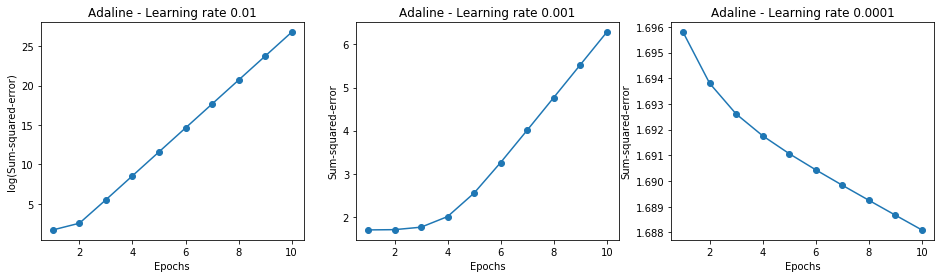

In [81]:
# Cost function plots.

plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(NF, NC)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.001).fit(NF, NC)
ax[1].plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_), marker='o')
ax[1].set_title('Adaline - Learning rate 0.001')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')

ada3 = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax[2].plot(range(1, len(ada3.cost_) + 1), np.log10(ada3.cost_), marker='o')
ax[2].set_title('Adaline - Learning rate 0.0001')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Sum-squared-error')
plt.show()

In [82]:
# Standarize inputs

NF_std = np.copy(NF)
NF_std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()

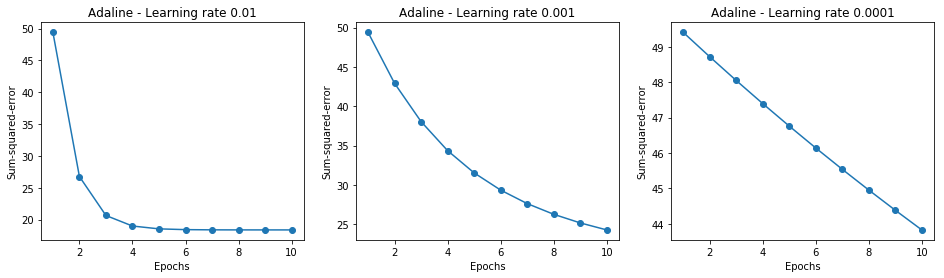

In [83]:
plt.close('all')
ada1.fit(NF_std, NC)
ada2.fit(NF_std, NC)
ada3.fit(NF_std, NC)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,4))

ax[0].plot(range(1, len(ada1.cost_) + 1), ada1.cost_, marker='o')
ax[0].set_title('Adaline - Learning rate 0.01')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Sum-squared-error')

ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_title('Adaline - Learning rate 0.001')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')

ax[2].plot(range(1, len(ada3.cost_) + 1), ada3.cost_, marker='o')
ax[2].set_title('Adaline - Learning rate 0.0001')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Sum-squared-error')
plt.show()

In [84]:
accuracy.append(ada1.cost_[9])

## The one case of using all features at once

In [85]:
fdx = np.array([0,1,2,3])
NF, NC = get_NF_NC()

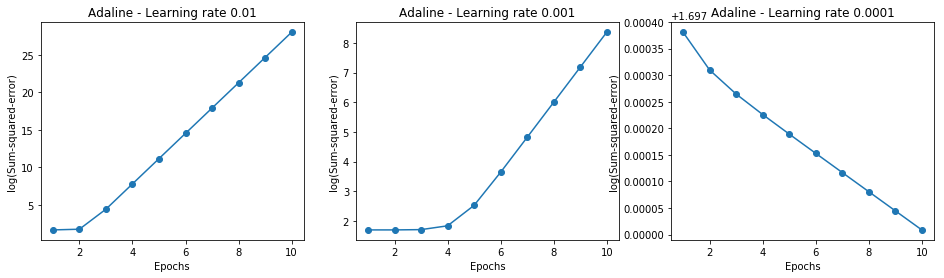

In [86]:
# Cost function plots.

plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(NF, NC)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.001).fit(NF, NC)
ax[1].plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.001')

ada3 = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax[2].plot(range(1, len(ada2.cost_) + 1), np.log10(ada3.cost_), marker='o')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('log(Sum-squared-error)')
ax[2].set_title('Adaline - Learning rate 0.0001')
plt.show()

In [87]:
# Standarize inputs

NF_std = np.copy(NF)
NF_std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()

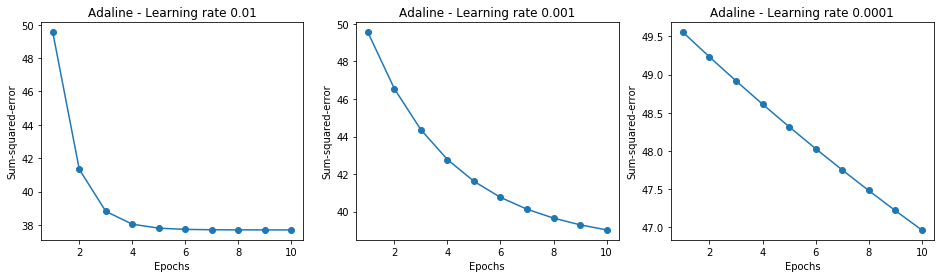

In [88]:
plt.close('all')
ada1.fit(NF_std, NC)
ada2.fit(NF_std, NC)
ada3.fit(NF_std, NC)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,4))

ax[0].plot(range(1, len(ada1.cost_) + 1), ada1.cost_, marker='o')
ax[0].set_title('Adaline - Learning rate 0.01')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Sum-squared-error')

ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_title('Adaline - Learning rate 0.001')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')

ax[2].plot(range(1, len(ada3.cost_) + 1), ada3.cost_, marker='o')
ax[2].set_title('Adaline - Learning rate 0.0001')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Sum-squared-error')
plt.show()

In [89]:
accuracy.append(ada1.cost_[9])

# Summary of findings

In [90]:
for i in range(len(accuracy)):
    print("Case {}: {}".format(i+1, round(accuracy[i],1)))

Case 1: 37.7
Case 2: 16.3
Case 3: 15.7
Case 4: 18.4
Case 5: 13.8
Case 6: 15.1
Case 7: 37.7
Case 8: 37.7
Case 9: 16.3
Case 10: 18.4
Case 11: 37.7


| **Cases** |**Features**| **Accuracy** | 
|-------|-----------------|-------------|
|   1   |       2         |   37.7     |
|   2   |       2         |   16.3     |
|   3   |       2         |   15.7     |
|   4   |       2         |   18.4     |
|   5   |       2         |   13.8     |
|   6   |       2         |   15.1     |
|   7   |       3         |   37.7     |
|   8   |       3         |   37.7     |
|   9   |       3         |   16.3     |
|   10  |       3         |   18.4     |
|   11  |       4         |   37.7     |


# Discussion of findings

After classifying various cases, it was observed that having more features generally produces less accurate results. Cases with 2 features mostly produced an accuracy around 15-18. But there is a case where it produced an accuracy of 37.7. Cases with 3 features had a lower accuracy and 4 feature is similar to the third one. It's possible that 37.7 is least accurate result we can get.